In [1]:
import numpy as np
import uproot
import uproot_methods
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import iminuit
import probfit as pf

def my_style(title='', xtitle='', ytitle='', gridstyle=':'):
    plt.grid(linestyle=gridstyle)
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    
%matplotlib inline
import matplotlib
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='talk', ticks=True, grid=True, gridlines='--', figsize=(13, 9), fscale=2)
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans', 'sans-serif']

In [2]:
%cd ../lib/

/spoolA/petrov/research/uproot/lib


In [3]:
from preparator import get_prepared_table

In [4]:
merge_points11 = [([887.5, 900., 912.5, 925., 935.], 910), ([945., 950., 962.5, 975., 987.5, 1000.], 950)]
merge_points12 = [([900, 920, 936], 920), ([950, 960, 970,], 950), ([ 980, 990], 960)] #12 year
merge_points17 = [([880., 890., 900.], 890), ([910., 920., 930.], 925),
           ([937.4, 937.5, 938.3, 938.9, 939.6, 940.2, 940.8], 939)] #17 year
merge_points19 = [([862.5, 875.0, 887.5, 900.0], 874), ([912.5, 925.0, 936.0, 945.0], 912), ([950.0, 951.1, 955.0], 952), 
                  ([962.5, 975.0, 978.0, 987.5], 980)] #19 year

In [13]:
data = {'11' : get_prepared_table('11', merge_points11, sys=False),
        '12' : get_prepared_table('12', merge_points12, sys=False),
        '13' : get_prepared_table('13', sys=False),
        '17' : get_prepared_table('17', merge_points17, sys=False),
        '19' : get_prepared_table('19', merge_points19, sys=False),
       }

Data folder: ../../outputs/11/trees/*_*.root
dataRAW.shape: (3947, 6)
Checking: 39 different names in 11 season
Energy points with bad trigger:
 525.0    15
537.5     1
Name: name, dtype: int64
Bad energy records: 0
3919 records left
Records in  lum: 40
Records in data: 40
Differences in lum and data: set()
Good. 3920 rows
Merge energies
Good. 3920 rows
Good. 3920 rows
Data folder: ../../outputs/12/trees/*_*.root
dataRAW.shape: (541, 6)
Checking: 16 different names in 12 season
Energy points with bad trigger:
 640.0    1
Name: name, dtype: int64
Bad energy records: 0
540 records left
Records in  lum: 16
Records in data: 16
Differences in lum and data: set()
Good. 540 rows
Merge energies
Good. 540 rows
Good. 540 rows
Data folder: ../../outputs/13/trees/*_*.root
dataRAW.shape: (2164, 6)
Checking: 2 different names in 13 season
Energy points with bad trigger:
 Series([], Name: name, dtype: int64)
Bad energy records: 0
2164 records left
Records in  lum: 2
Records in data: 2
Differences in 

In [40]:
year = '11'
dt = data[year][['trigger','name']].query('name==550')
tr = pd.get_dummies(dt.trigger)
tr.columns = ['tf', 'cf', 'tc']
tr.tf, tr.cf = tr.tf + tr.tc, tr.cf + tr.tc
tf, cf, tc = tr.sum()

In [44]:
n0 = 521
e = tf/n0 + cf/n0 - tf*cf/n0/n0
print(e)

0.7446516922646174


In [42]:
tr

,tf,cf,tc
1692,1,0,0
1693,1,0,0
1694,1,1,1
1695,1,1,1
1696,1,1,1
...,...,...,...
2075,0,1,0
2076,1,1,1
2077,1,0,0
2078,1,0,0


In [43]:
tf*cf/tc

521.1881188118812

In [36]:
trcov = {}
for year in data:
    tr = data[year][['trigger','name']].set_index('name')
    tr = pd.get_dummies(tr.trigger)
    tr[0] += tr[2]
    tr[1] += tr[2]
    tr.drop([2], axis=1, inplace=True)
    tr.columns = ['TF', 'CF']    
    names, covs = [], []
    for name, df in tr.groupby('name'):
        dfm = df.mean()
        efft = 1 - (1-dfm['TF'])*(1-dfm['CF'])
        names.append( name )
        covs.append( np.cov( df.values.T )[0,1]/efft )
    trcov[year] = (names, covs)

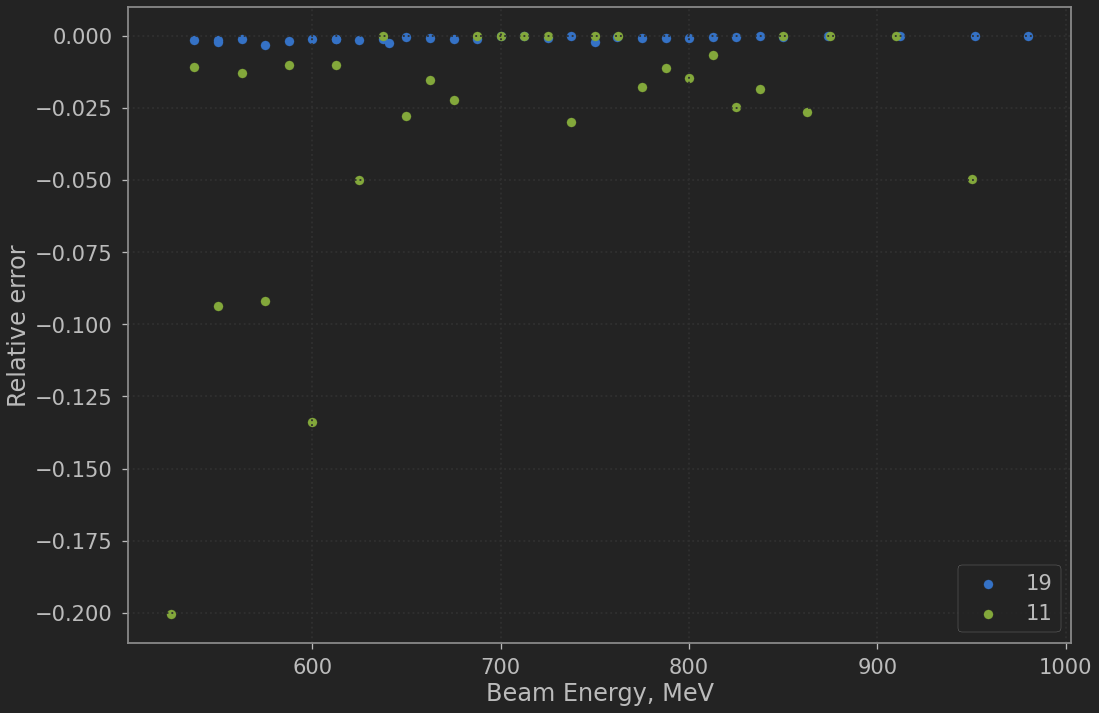

In [39]:
plt.scatter( trcov['19'][0], trcov['19'][1], label='19' )
# plt.scatter( trcov['17'][0], trcov['17'][1], label='17' )
# plt.scatter( trcov['12'][0], trcov['12'][1], label='12' )
plt.scatter( trcov['11'][0], trcov['11'][1], label='11' )
# plt.scatter( trcov['13'][0], trcov['13'][1], label='13' )
my_style('', 'Beam Energy, MeV', 'Relative error')
plt.legend();
# plt.ylim(-0.05, 0.001)